<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/5_1_Finding_anomalies_in_data_and_dealing_with_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Будем осуществлять работу с набором данных [“horse_data.csv”](https://drive.google.com/open?id=1HSVXHKLog4MYnAENgYrYAfftDpULE_ZQ&usp=drive_fs) о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

# Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов в файле [“horse_data.names”](https://drive.google.com/open?id=1HO0ebEMmFlCS9Worz5xETcq-rCYvcKlc&usp=drive_fs) , загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.


In [ ]:
# Загружаем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загружаем файлы (horse_data.names)
with open('/content/horse_data.names', mode='r', encoding='utf-8') as file:
    # Читаем содержимое файла целиком
    content = file.read()
print(content)

1. TItle: Horse Colic database

2. Source Information
   -- Creators: Mary McLeish & Matt Cecile
	  	Department of Computer Science
		University of Guelph
		Guelph, Ontario, Canada N1G 2W1
		mdmcleish@water.waterloo.edu
   -- Donor:    Will Taylor (taylor@pluto.arc.nasa.gov)
   -- Date:     8/6/89

3. Past Usage:
   -- Unknown

4. Relevant Information:

   -- 2 data files
      -- horse-colic.data: 300 training instances
      -- horse-colic.test: 68 test instances
   -- Possible class attributes: 24 (whether lesion is surgical)
     -- others include: 23, 25, 26, and 27
   -- Many Data types: (continuous, discrete, and nominal)

5. Number of Instances: 368 (300 for training, 68 for testing)

6. Number of attributes: 28

7. Attribute Information:

  1:  surgery?
          1 = Yes, it had surgery
          2 = It was treated without surgery

  2:  Age
          1 = Adult horse
          2 = Young (< 6 months)

  3:  Hospital Number
          - numeric id
          - the case number assi

In [ ]:
# Загрузка данных из CSV-файла, игнорируя столбцы с пропусками ('?'), выбираем только нужные столбцы
# и задаём имена столбцов вручную согласно задания

horse_data = pd.read_csv('/content/horse_data.csv',  na_values = '?', usecols = [0, 1, 3, 4, 5, 6, 10, 22], header = None,
names = ['surgery?','Age','rectal temperature','pulse','respiratory rate','temperature of extremities','pain','outcome'])
horse_data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
# Просмотрим информацию
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


# Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

# Столбец пульс

In [ ]:
# Посчитаем базовые статистики для пульса:

print(round(horse_data['pulse'].mean(),5)) # Средний пульс
print(horse_data['pulse'].median()) # Медиана пульса
print(horse_data['pulse'].round().mode()[0]) # Мода пульс

71.91304
64.0
48.0


In [ ]:
horse_data['pulse'].describe() # выводим описательные статистики по пульсу

,pulse
count,276.000000
mean,71.913043
std,28.630557
min,30.000000
25%,48.000000
50%,64.000000
75%,88.000000
max,184.000000


In [ ]:
q1 = horse_data['pulse'].quantile(0.25) # Рассчитываем первый квартиль для показателя пульса
q3 = horse_data['pulse'].quantile(0.75) # Рассчитываем третий квартиль для показателя пульса
iqr = q3 - q1 # Определим межквартильный размах
lower_bound = q1 - (1.5 * iqr) # Рассчитываем нижнюю границу для определения выбросов
upper_bound = q3 + (1.5 * iqr) # Рассчитываем верхнюю границу для определения выбросов
remove_outliers_1 = horse_data[horse_data['pulse'].between(lower_bound, upper_bound, inclusive="both")] # Создаем новый датафрейм без выбросов, оставляя только значения внутри диапазона
remove_outliers_1

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
6,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
remove_outliers_1['pulse'].describe()

,pulse
count,271.000000
mean,70.258303
std,26.082484
min,30.000000
25%,48.000000
50%,64.000000
75%,88.000000
max,146.000000


**Выводы:**
Удаление выбросов по столбцу пульс улучшило статистические показатели, сделав их более репрезентативными для основной части данных. Среднее значение стало ближе к медиане, стандартное отклонение уменьшилось, максимальный выброс был устранен, что свидетельствует об улучшении качества анализа.

# Столбец ректальная температура

In [ ]:
# Посчитаем базовые статистики для ректальной температуры:

print(round(horse_data['rectal temperature'].mean(),5)) # Средняя температура
print(horse_data['rectal temperature'].median()) # Медиана температура
print(horse_data['rectal temperature'].mode()[0]) # Мода температура


38.16792
38.2
38.0


In [ ]:
horse_data['rectal temperature'].describe()

,rectal temperature
count,240.000000
mean,38.167917
std,0.732289
min,35.400000
25%,37.800000
50%,38.200000
75%,38.500000
max,40.800000


In [ ]:
q1 = horse_data['rectal temperature'].quantile(0.25) # Рассчитываем первый квартиль для показателя ректальной температуры
q3 = horse_data['rectal temperature'].quantile(0.75) # Рассчитываем третий квартиль для показателя ректальной температуры
iqr = q3 - q1 # Определим межквартильный размах
lower_bound = q1 - (1.5 * iqr) # Рассчитываем нижнюю границу для определения выбросов
upper_bound = q3 + (1.5 * iqr) # Рассчитываем верхнюю границу для определения выбросов
remove_outliers_2 = horse_data[horse_data['rectal temperature'].between(lower_bound, upper_bound, inclusive="both")] # Создаем новый датафрейм без выбросов, оставляя только значения внутри диапазона
remove_outliers_2

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
292,1.0,1,37.0,66.0,20.0,1.0,4.0,2.0
294,2.0,1,38.5,40.0,16.0,1.0,2.0,1.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0


In [ ]:
remove_outliers_2['rectal temperature'].describe()

,rectal temperature
count,226.000000
mean,38.169027
std,0.571949
min,36.800000
25%,37.800000
50%,38.200000
75%,38.500000
max,39.500000


По температуре средняя температура и медиана ректальной температуры одинаковы, предположим, что данные по температуре распределены нормально, построим гистограмму.

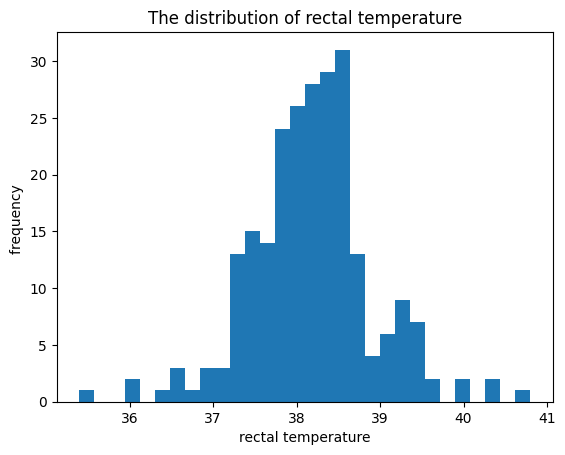

In [ ]:
# Cтроим гистограмму:

plt.hist(horse_data['rectal temperature'], bins=30)
plt.title('The distribution of rectal temperature')
plt.xlabel('rectal temperature')
plt.ylabel('frequency ')
plt.show() # Гистограмма стремится к нормальному распределению

In [ ]:
# Найдем выбросы, которые были удалены
outliers = horse_data[~horse_data['rectal temperature'].isin(remove_outliers_2['rectal temperature'])]

# Выведем выбросы
print("Выбросы:")
print(outliers)

Выбросы:
     surgery?  Age  rectal temperature  pulse  respiratory rate  \
5         2.0    1                 NaN    NaN               NaN   
7         1.0    1                 NaN   60.0               NaN   
8         2.0    1                 NaN   80.0              36.0   
16        1.0    9                 NaN  128.0              36.0   
20        1.0    1                39.9   72.0              60.0   
..        ...  ...                 ...    ...               ...   
282       1.0    1                 NaN   70.0              16.0   
288       1.0    1                 NaN    NaN               NaN   
293       1.0    1                 NaN   78.0              24.0   
295       1.0    1                 NaN  120.0              70.0   
298       1.0    1                36.5  100.0              24.0   

     temperature of extremities  pain  outcome  
5                           2.0   2.0      1.0  
7                           3.0   NaN      2.0  
8                           3.0   4.0  

In [ ]:
# Выводим разницу между средним значением ректальной температуры в исходном DataFrame и среднем значением высоты в DataFrame без выбросов

print(horse_data['rectal temperature'].mean() - remove_outliers_2['rectal temperature'].mean())

-0.00110988200589901


**Выводы**

Разница между средним значением ректальной температуры в исходном наборе данных (horse_data) и средним значением после удаления выбросов (remove_outliers_2) составляет примерно -0.00111. Это означает, что среднее значение стало немного меньше после удаления выбросов.
Разница крайне мала, что указывает на то, что удаление выбросов не сильно повлияло на среднее значение ректальной температуры. Возможно, выбросы были незначительными или их было мало. Малая разница также может свидетельствовать о хорошем качестве исходных данных, так как выбросы не оказали существенного влияния на среднюю температуру.Если требуется более точное понимание того, какие именно данные были удалены как выбросы, стоит провести дополнительный анализ этих данных. Возможно, они содержат важную информацию, которую следует учесть в дальнейшем анализе.
В целом, такая небольшая разница говорит о том, что данные по температуре достаточно стабильны, и выбросы не оказывают сильного влияния на средние показатели.



# Столбец частота дыхания

In [ ]:
# Посчитаем базовые статистики для частоты дыхания:

print(round(horse_data['respiratory rate'].mean(),5)) # Средняя частота дыхания
print(horse_data['respiratory rate'].median()) # Медиана частота дыхания
print(horse_data['respiratory rate'].mode()[0]) # Мода частота дыхания

30.41736
24.5
20.0


In [ ]:
horse_data['respiratory rate'].describe() # описательная статистика по частоте дыхания

,respiratory rate
count,242.000000
mean,30.417355
std,17.642231
min,8.000000
25%,18.500000
50%,24.500000
75%,36.000000
max,96.000000


In [ ]:
q1 = horse_data['respiratory rate'].quantile(0.25) # Рассчитываем первый квартиль для показателя частота дыхания
q3 = horse_data['respiratory rate'].quantile(0.75) # Рассчитываем третий квартиль для показателя частота дыхания
iqr = q3 - q1 # Определим межквартильный размах
lower_bound = q1 - (1.5 * iqr) # Рассчитываем нижнюю границу для определения выбросов
upper_bound = q3 + (1.5 * iqr) # Рассчитываем верхнюю границу для определения выбросов
remove_outliers_3 = horse_data[horse_data['respiratory rate'].between(lower_bound, upper_bound, inclusive="both")] # Создаем новый датафрейм без выбросов, оставляя только значения внутри диапазона
remove_outliers_3

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
6,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
294,2.0,1,38.5,40.0,16.0,1.0,2.0,1.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
remove_outliers_3['respiratory rate'].describe() # описательная статистика по частоте дыхания после удаления выбросов

,respiratory rate
count,225.000000
mean,26.715556
std,11.461464
min,8.000000
25%,18.000000
50%,24.000000
75%,35.000000
max,60.000000


**Выводы:**
Удаление выбросов по частоте дыхания заметно улучшило статистическую картину данных по частоте дыхания. Среднее значение стало ниже и, вероятно, теперь лучше отражает реальное состояние пациентов. Снижение стандартного отклонения и максимальных значений подтверждает успешность процедуры очистки данных от выбросов.

# Столбец surgery?

In [ ]:
# Столбец относится к категориальным, поэтому посмотрим моду
print(horse_data['surgery?'].mode()[0]) # Мода по значению хирургическое вмешательство. Параметр 1 означает, что хирургическое вмешательство было

1.0


In [ ]:
unique_categories_surgery = horse_data['surgery?'].unique() # Посмотрим все уникальные значения в столбце 'surgery?'
unique_categories_surgery

array([ 2.,  1., nan])

In [ ]:
category_distribution_surgery = horse_data['surgery?'].value_counts() # Посчитаем значения по категориям 1 - есть вмешательство и 2 - не было вмешательства
category_distribution_surgery

,count
surgery?,
1.0,180
2.0,119


In [ ]:
category_distribution_percentages_surgery = (category_distribution_surgery / len(horse_data) * 100).round(2) # Переведем в проценты
category_distribution_percentages_surgery

,count
surgery?,
1.0,60.00
2.0,39.67


Таким образом по категориальному столбцу surgery? мы видим, что хирургическое вмешательство было у большинства лошадей, а именно у 60 %.

# Столбец Age

In [ ]:
print(horse_data['Age'].mode()[0]) # Мода по возрасту. Параметр 1 является самым частым, по нашей классификации это обозначает взрослых лошадей.

1


In [ ]:
unique_categories_age = horse_data['Age'].unique() # Посмотрим все уникальные значения в столбце возраст. Здесь мы видим значение 9
unique_categories_age                              # а в классификаторе оно отсутствует. Значение 2 из классификатора наоборот отсутствует
                                                   # вероятно это ошибка, или перепутаны цифры значения. Предположим, что 9 это некорректно распознанная 2

array([1, 9])

In [ ]:
df = (horse_data['Age'].replace(9, 2)) # Сделаем замену, заменим 9 на 2 в копии основной базы и посчитаем значения категорий возраста
df.value_counts()

,count
Age,
1,276
2,24


Можно сделать выводы, что работа со столбцом возраст строится на предположении, что данные были неверно распознаны, поэтому целесообразно заменить на вторую категорию и исследовать данные в таком виде. Мы получаем данные, что большинство лошадей были взрослыми.

# Столбец температура конечностей

In [ ]:
print(horse_data['temperature of extremities'].mode()[0]) # Мода по температуре конечностей. Значение 3 обозначает прохладный, это самое распостраненное значение

3.0


In [ ]:
unique_categories_extremities = horse_data['temperature of extremities'].unique() # Посмотрим все уникальные значения в столбце 'temperature of extremities?'
unique_categories_extremities # Значения от 1 до 4 соответствуют перечню, так же видим, что есть незаполненные поля

array([ 3., nan,  1.,  4.,  2.])

In [ ]:
category_distribution_extremities = horse_data['temperature of extremities'].value_counts() # Посчитаем значения по категориям
category_distribution_extremities

,count
temperature of extremities,
3.0,109
1.0,78
2.0,30
4.0,27


In [ ]:
category_distribution_percentages_extremities = (category_distribution_extremities / len(horse_data) * 100).round(2) # Переведем в проценты
category_distribution_percentages_extremities # переведем в проценты

,count
temperature of extremities,
3.0,36.33
1.0,26.00
2.0,10.00
4.0,9.00


По данному столбцу можно сделать выводов, что нет значений, не соответствующих указанным четырем категориям, но есть пропущенные значения.

Распределения температуры конечностей по процентам:
*   Прохладные - 	36.33 %
*   Нормальные - 	26.00 %
*   Теплые -	10.00 %
*   Холодные - 	9.00 %

# Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [ ]:
# Для каждого столбца DataFrame horse_data вычисляем процент пропущенных значений,
# округляя результат до двух знаков после запятой

(horse_data.isna().mean() * 100).round(2)


,0
surgery?,0.33
Age,0.00
rectal temperature,20.00
pulse,8.00
respiratory rate,19.33
temperature of extremities,18.67
pain,18.33
outcome,0.33


In [ ]:
# Информация о датасете до удаления пропусков:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
# Печатаем среднее значение частоты дыхания, игнорируя пропуски
print('Среднее значение: ', horse_data['respiratory rate'].mean())

# Печатаем медиану (центральное значение) частоты дыхания, игнорируя пропуски
print('Медиана: ', horse_data['respiratory rate'].median())

# Печатаем наиболее часто встречающееся значение частоты дыхания (модальное), игнорируя пропуски
print('Мода: ', horse_data['respiratory rate'].mode()[0])

# Печатаем стандартное отклонение (квадратичный корень из дисперсии) частоты дыхания, игнорируя пропуски
print('Стандартное отклонение: ', horse_data['respiratory rate'].std())

# Печатаем дисперсию ( вариацию значений относительно среднего) частоты дыхания, игнорируя пропуски
print('Дисперсия: ', horse_data['respiratory rate'].var())

Среднее значение:  30.417355371900825
Медиана:  24.5
Мода:  20.0
Стандартное отклонение:  17.642231385134664
Дисперсия:  311.24832824663054


In [ ]:
# Удаляем строки с пропущенными данными и выводим информацию об оставшемся DataFrame
horse_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    154 non-null    float64
 1   Age                         154 non-null    int64  
 2   rectal temperature          154 non-null    float64
 3   pulse                       154 non-null    float64
 4   respiratory rate            154 non-null    float64
 5   temperature of extremities  154 non-null    float64
 6   pain                        154 non-null    float64
 7   outcome                     154 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 10.8 KB


In [ ]:
horse_data.dropna().head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
6,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
10,1.0,1,38.1,66.0,12.0,3.0,3.0,1.0


In [ ]:
# Печатаем среднее значение частоты дыхания после удаления пропусков
print('Среднее значение: ', horse_data.dropna()['respiratory rate'].mean())

# Печатаем медиану (центральное значение) частоты дыхания после удаления пропусков
print('Медиана: ', horse_data.dropna()['respiratory rate'].median())

# Печатаем наиболее часто встречающееся значение частоты дыхания (модальное) после удаления пропусков
print('Мода: ', horse_data.dropna()['respiratory rate'].mode()[0])

# Печатаем стандартное отклонение (квадратичный корень из дисперсии) частоты дыхания после удаления пропусков
print('Стандартное отклонение: ', horse_data.dropna()['respiratory rate'].std())

# Печатаем дисперсию ( вариацию значений относительно среднего) частоты дыхания после удаления пропусков
print('Дисперсия: ', horse_data.dropna()['respiratory rate'].var())

Среднее значение:  29.649350649350648
Медиана:  27.0
Мода:  16.0
Стандартное отклонение:  16.12229912225153
Дисперсия:  259.9285289873524


Удаление пропусков привело к снижению среднего значения, увеличению медианы, уменьшению моды, а также к снижению как стандартного отклонения, так и дисперсии. Эти изменения указывают на то, что исходные данные по частоте дыхания были довольно неоднородны, и их обработка привела к улучшению характеристик распределения.

In [ ]:
# предположим, мы хотим оставить только те строки, в которых как минимум 7/8 значений заполнено
# hresh=8 — указывает, что строка должна содержать как минимум 8 непустых значений, чтобы остаться в DataFrame.
#Таким образом, строки, в которых менее 7 значений заполнены, будут удалены.
horse_data.dropna(thresh=8)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
6,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
10,1.0,1,38.1,66.0,12.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...
292,1.0,1,37.0,66.0,20.0,1.0,4.0,2.0
294,2.0,1,38.5,40.0,16.0,1.0,2.0,1.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0


In [ ]:
# Создаем копию DataFrame для работы без изменения оригинала
fill_by_cnst = horse_data.copy()

# Заполняем пропущенные значения в столбце 'respiratory rate' строкой 'no_info'
fill_by_cnst['respiratory rate'] = fill_by_cnst['respiratory rate'].fillna('no_info')

# Выводим количество оставшихся пропусков после заполнения
print("Количество оставшихся пропусков:", fill_by_cnst['respiratory rate'].isna().sum())

# Выводим уникальные значения в заполненном столбце 'respiratory rate'
print("Уникальные значения в столбце 'respiratory rate':", fill_by_cnst['respiratory rate'].unique())

Количество оставшихся пропусков: 0
Уникальные значения в столбце 'respiratory rate': [28.0 20.0 24.0 84.0 35.0 'no_info' 16.0 36.0 12.0 52.0 48.0 21.0 60.0
 34.0 42.0 30.0 96.0 72.0 15.0 44.0 32.0 22.0 18.0 80.0 40.0 10.0 51.0
 68.0 66.0 9.0 14.0 90.0 8.0 23.0 58.0 13.0 70.0 26.0 88.0 25.0 50.0]


In [ ]:
# Заменяем средним

# Создаем копию DataFrame для работы без изменения оригинала
fill_mean = horse_data.copy()

# Заполняем пропущенные значения в столбце 'respiratory rate' средним значением по этому столбцу
fill_mean['respiratory rate'] = fill_mean['respiratory rate'].fillna(horse_data['respiratory rate'].mean())

In [ ]:
print(horse_data['respiratory rate'].describe())
print('-' * 40)
print(fill_mean['respiratory rate'].describe())

count    242.000000
mean      30.417355
std       17.642231
min        8.000000
25%       18.500000
50%       24.500000
75%       36.000000
max       96.000000
Name: respiratory rate, dtype: float64
----------------------------------------
count    300.000000
mean      30.417355
std       15.838952
min        8.000000
25%       20.000000
50%       30.000000
75%       34.250000
max       96.000000
Name: respiratory rate, dtype: float64


**Выводы по заполнению средним:**

После заполнения пропусков количество наблюдений увеличилось с 242 до 300,добавились ранее отсутствующие данные.
Среднее значение осталось тем же самым (30.42). Это говорит о том, что добавленные данные сбалансировали общий средний показатель.
Стандартное отклонение уменьшилось с 17.64 до 15.84. Это указывает на то, что добавление новых данных сократило разброс значений относительно среднего, что делает распределение более компактным.
Минимальное и максимальное значения остались неизменными, что говорит о том, что крайние значения в оригинальном наборе данных сохранились и после добавления новых точек.Первый квартиль увеличился с 18.5 до 20, указывая на то, что нижняя часть распределения стала чуть плотнее.
Медиана увеличилась с 24.5 до 30, что свидетельствует о смещении центральной точки распределения вверх.Третий квартиль уменьшился с 36 до 34.25, что указывает на сдвиг верхней части распределения ближе к среднему значению.

Таким образом, заполнение пропусков привело к уменьшению разброса данных и изменениям в распределении, при этом среднее значение осталось неизменным.

In [ ]:
# Заменим медианой

fill_median = horse_data.copy()

fill_median['respiratory rate'] = fill_median['respiratory rate'].fillna(horse_data['respiratory rate'].median())

In [ ]:
print(horse_data['respiratory rate'].describe())
print('-' * 40)
print(fill_median['respiratory rate'].describe())

count    242.000000
mean      30.417355
std       17.642231
min        8.000000
25%       18.500000
50%       24.500000
75%       36.000000
max       96.000000
Name: respiratory rate, dtype: float64
----------------------------------------
count    300.000000
mean      29.273333
std       16.010979
min        8.000000
25%       20.000000
50%       24.500000
75%       34.250000
max       96.000000
Name: respiratory rate, dtype: float64


**Выводы по замене медианой:**

После заполнения пропусков количество наблюдений увеличилось с 242 до 300, добавились ранее отсутствующие данные. Среднее значение: Среднее значение уменьшилось с 30.42 до 29.27. Это указывает на то, что добавленные данные имели меньшие значения, чем средние значения оригинального набора данных. Стандартное отклонение уменьшилось с 17.64 до 16.01. Это говорит о том, что новые данные привели к меньшей вариации относительно среднего значения, делая распределение более плотным около средней точки. Минимальное и максимальное значения остались неизменными, что говорит о том, что крайние значения в оригинальном наборе данных сохранились и после добавления новых точек.Первый квартиль увеличился с 18.5 до 20, указывая на то, что нижняя часть распределения стала чуть плотнее. Медиана осталась той же самой (24.5), что говорит о том, что центральная точка распределения практически не изменилась.
Третий квартиль уменьшился с 36 до 34.25, что свидетельствует о сдвиге верхней части распределения ближе к среднему значению.

Таким образом, заполнение пропусков привело к изменению некоторых статистических показателей, таких как среднее значение и стандартное отклонение, однако основные характеристики распределения, такие как медиана и размах, остались стабильными.

In [ ]:
fill_mode = horse_data.copy()
fill_mode['temperature of extremities'] = fill_mode['temperature of extremities'].fillna(fill_mode['temperature of extremities'].mode()[0])

При просмотре категориальных значений во втором задании мы обнаружили пропущенные значения в столбце температура конечностей. Заменим их модой, предпочтительной для категориальных значений.

In [ ]:
print(horse_data['temperature of extremities'].describe())
print('-' * 40)
print(fill_mode['temperature of extremities'].describe())

count    244.000000
mean       2.348361
std        1.045054
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: temperature of extremities, dtype: float64
----------------------------------------
count    300.000000
mean       2.470000
std        0.975845
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: temperature of extremities, dtype: float64


**Выводы:** удаление выбросов привело к незначительному увеличению среднего значения и уменьшению стандартного отклонения, что указывает на улучшение однородности данных. Однако основные характеристики распределения (квартили и экстремумы) остались неизменными, что говорит о стабильности общей структуры данных.

In [ ]:
df_1 = horse_data.copy()                                           #заполним пропущенные значения в столбце 'rectal temperature'
df_1['rectal temperature'] = df_1['rectal temperature'].fillna(    # на основе медианы соответствующих возрастных групп и
    df_1.groupby('surgery?')['rectal temperature'].transform('median')  # выведем статистику по заполненным данным
)
print(horse_data['rectal temperature'].describe())
print('*' * 40)
print(df_1['rectal temperature'].describe())

count    240.000000
mean      38.167917
std        0.732289
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal temperature, dtype: float64
****************************************
count    300.000000
mean      38.161000
std        0.655192
min       35.400000
25%       37.900000
50%       38.100000
75%       38.500000
max       40.800000
Name: rectal temperature, dtype: float64


**Выводы:** заполнение пропущенных значений в столбце ректальная температура на основании медианы соответствующих возрастных групп привело к небольшому снижению среднего значения и значительному уменьшению стандартного отклонения, что указывает на улучшение однородности данных. Однако основные характеристики распределения (квартили и экстремумы) остались практически неизменными, что говорит о стабильности общей структуры данных.

In [ ]:
df_2 = horse_data.copy()
df_2['outcome'] = df_2['outcome'].fillna(
    df_2.groupby('rectal temperature')['outcome'].transform('median')) # Заполняем пропущенные значения в столбце 'outcome' на основе медианы группы,
                                                                       # определенной по значению столбца 'rectal temperature'
print(horse_data['outcome'].describe())
print('*' * 40)
print(df_2['outcome'].describe())

count    299.000000
mean       1.551839
std        0.737187
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: outcome, dtype: float64
****************************************
count    300.000000
mean       1.550000
std        0.736642
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: outcome, dtype: float64


**Выводы:** Предполагаем, что что температура тела напрямую влияет на исход болезни. Высокая температура чаще приводит к определённому исходу. Заполнение пропущенного значения в столбце 'outcome' на основе медианы группы, определенной по значению столбца 'rectal temperature', привело к увеличению числа наблюдений на одну единицу и незначительному уменьшению среднего значения. Распределение данных (стандартное отклонение, медиана, квартили, минимум и максимум) осталось практически неизменным, что говорит о корректности использованного метода заполнения пропуска.

In [ ]:
# Заполнение пропущенных значений в столбце 'outcome' на основе моды группы 'pain'
df_3['outcome'] = df_3['outcome'].fillna(
    df_3.groupby('pain')['outcome'].transform(lambda x: x.mode()[0])
)
print(horse_data['outcome'].describe())
print('*' * 40)
print(df_3['outcome'].describe())

count    299.000000
mean       1.551839
std        0.737187
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: outcome, dtype: float64
****************************************
count    300.000000
mean       1.550000
std        0.736642
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: outcome, dtype: float64


**Выводы:**  здесь мы заполняем пропущенные значения в столбце 'outcome' на основе наиболее часто встречающихся значений в группах, сформированных по уровню боли 'pain'. Заполнение пропущенного значения в столбце 'outcome' на основе моды группы 'pain' привело к увеличению количества наблюдений на единицу и незначительному уменьшению среднего значения. При этом распределение данных (стандартное отклонение, медиана, квартили, минимум и максимум) осталось практически неизменным, что говорит о корректности выбранного метода заполнения пропуска.
